# Week6 - Classifier Evaluation Assignment

- Complete this Jupyter Notebook.  
- Execute the initial cells and answer the numbered questions.  
- Don't import other libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

results = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/lab-evaluation-data.csv')
results.head()

,actual,prob
0,0.0,0.380052
1,1.0,0.827923
2,1.0,0.929093
3,1.0,0.472508
4,1.0,0.906988


## Data Definitions
- `actual`: Whether the event was true or not. A value of 1.0 is True and 0.0 is False.  
- `prob`: The probability that the event was True. This is estimated from a classification model.

## Question 1
- Determine the distribution of the actual event.
- Would you be concerned about bias due to imbalance?

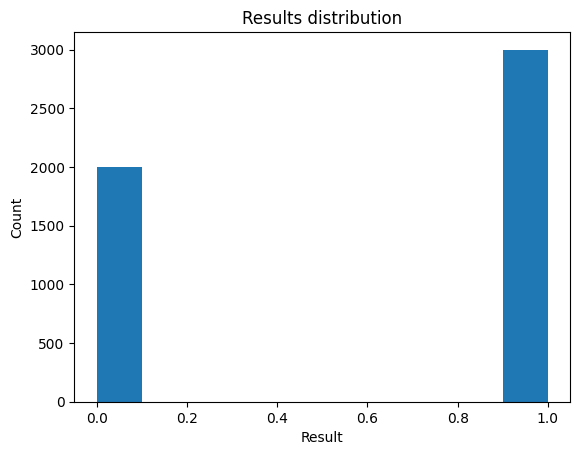

In [2]:
# insert code here
plt.hist(results['actual'])
plt.title('Results distribution')
plt.xlabel('Result')
plt.ylabel('Count')
plt.show()

In [3]:
count = results.groupby(['actual']).actual.count()
count

actual
0.0    2000
1.0    3000
Name: actual, dtype: int64

I would not say that this is the most balanced dataset, but the balancing is not despisable.

## Question 2
- Create a histogram that shows the distribution of the probabilities for the True and False classes.  
- Describe what you observe.

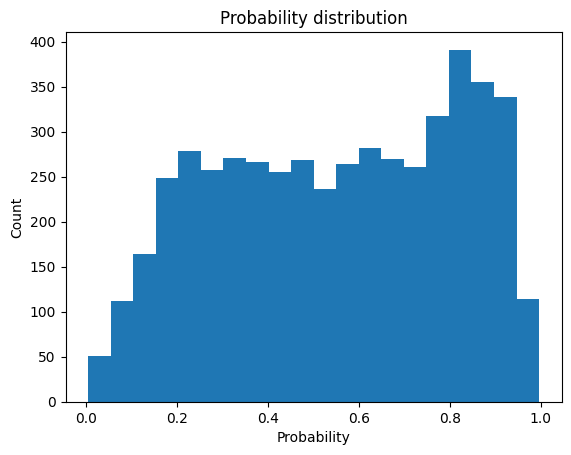

In [4]:
# insert code here
plt.hist(results['prob'], bins=20)
plt.title('Probability distribution')
plt.xlabel('Probability')
plt.ylabel('Count')
plt.show()

The probability distribution shows that there is a clear concentration of data towards the right. It would be better if the histogram had a more centered spread to it for creating a balanced dataset.

## Question 3
- Create a simple confusion matrix. Use `0.5` as the threshold for whether an observation should be considered True or False.  
- Comment on what you observe.

In [5]:
# insert code here
def createCMLabels(actual, prob):
    if actual == 1.0 and prob >= 0.5:
        return 'TP'
    elif actual == 0.0 and prob >= 0.5:
        return 'FP'
    elif actual == 1.0 and prob < 0.5:
        return 'FN'
    elif actual == 0.0 and prob < 0.5:
        return 'TN'
    else:
        return 'Could not determine'

results['label'] = results.apply(lambda x: createCMLabels(x.actual, x.prob), axis=1)
results.head(5)

,actual,prob,label
0,0.0,0.380052,TN
1,1.0,0.827923,TP
2,1.0,0.929093,TP
3,1.0,0.472508,FN
4,1.0,0.906988,TP


In [6]:
TP = results.groupby(['label']).label.count()['TP']
FP = results.groupby(['label']).label.count()['FP']
FN = results.groupby(['label']).label.count()['FN']
TN = results.groupby(['label']).label.count()['TN']
confusion_matrix = np.array([[TP, FP], [FN, TN]])
print(confusion_matrix)

[[2623  210]
 [ 377 1790]]


This model mislabedled quite a bit more negatives than it mislabeled positives, 167 more mislabeled negatives to be exact. This is in line with the data's imbalanced characteristics however, as there are more positives than negatives in the dataset. 

## Question 4
- Calculate the accuracy, precision, and recall `without` using any pre-built functions.
- Which measure would you use if this was your model and why?

In [9]:
# insert code here
acc = (TP + TN) / (TP + TN + FP + FN)
prec = TP / (TP + FP)
rec = TP / (TP + FN)
print(f'Accuracy: {acc}')
print(f'Precision: {prec}')
print(f'Recall: {rec}')

Accuracy: 0.8826
Precision: 0.9258736321920226
Recall: 0.8743333333333333


It is hard to say since we don't know what the business case is. However, since there are more positives than negatives in the dataset, I would look at recall as the most important metric for the overall model, as it would be the "weakest link". Given that recall here is 87.4%, I would say that this is a relatively good model - but again, it depends on the business case.

## Question 5
- Construct a ROC curve plot.  
- Comment on the fit of the model based on this chart.

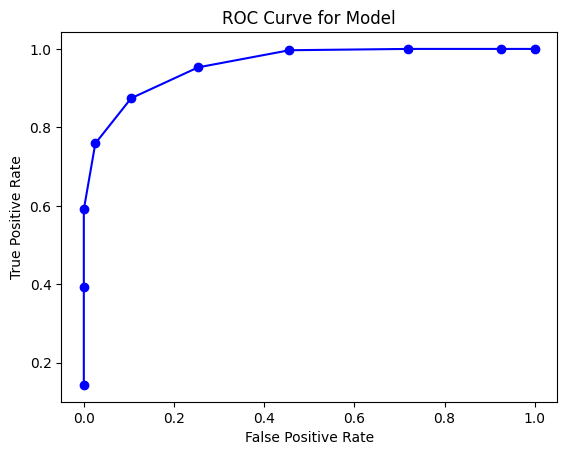

In [35]:
# Insert code here
def createCMLabelsWithThreshold(actual, prob, threshold):
    if actual == 1.0 and prob >= threshold:
        return 'TP'
    elif actual == 0.0 and prob >= threshold:
        return 'FP'
    elif actual == 1.0 and prob < threshold:
        return 'FN'
    elif actual == 0.0 and prob < threshold:
        return 'TN'
    else:
        return 'Could not determine'

TPRateArr = []
FPRateArr = []
for thres in np.arange(0.0, 1, .1):
    results['label'] = results.apply(lambda x: createCMLabelsWithThreshold(x.actual, x.prob, threshold=thres), axis=1)
    try: 
        TP = results.groupby(['label']).label.count()['TP']
    except:
        TP = 0
    try: 
        FP = results.groupby(['label']).label.count()['FP']
    except:
        FP = 0
    try:
        FN = results.groupby(['label']).label.count()['FN']
    except:
        FN = 0
    try:
        TN = results.groupby(['label']).label.count()['TN']
    except:
        TN = 0
    TPRate = TP / (TP + FN)
    FPRate = FP / (FP + TN)
    
    TPRateArr.append(TPRate)
    FPRateArr.append(FPRate)

plt.plot(FPRateArr, TPRateArr, 'bo-')
plt.title('ROC Curve for Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Based on the ROC curve here, the fit seems pretty good, since the curve is close to the upper left hand corner of the graph.